# Main Analysis

In [1]:
# Libraries
import numpy as np 
import pandas as pd
import HelperClass as hc 
from IPython.display import display, HTML


In [2]:
data = pd.read_csv('./data/premiums_data.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print("DATA EVALUATION")
print(f"Percentage of Individuals Older than 18: {len(data[data['age'] > 18]) / len(data)}")
print(f"Percentage of Females: {len(data[data['sex'] == 'female']) / len(data)}")
print(f"Average BMI in the sample: {np.mean(data['bmi'])}")
print(f"Average number of children: {np.mean(data['children'])}")
print(f"Percentage of sample that smokes: {len(data[data['smoker'] == 'yes']) / len(data)}")
print(f"Average premium charge: {np.mean(data.charges)}")
print()
print(f"Regional Breakdown:\n{data.region.value_counts()}")

DATA EVALUATION
Percentage of Individuals Older than 18: 0.9484304932735426
Percentage of Females: 0.4947683109118087
Average BMI in the sample: 30.663396860986538
Average number of children: 1.0949177877429
Percentage of sample that smokes: 0.20478325859491778
Average premium charge: 13270.422265141257

Regional Breakdown:
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


Note: The dataset does seem to be very balanced in terms of region and gender. We do have some data from children (individuals under the age of 18) which should be considered differently since those would need to be family plans. Additionally, each region is not proportionately represented by the real proportions in those regions (e.g. the northeast would have significantly more people than the southwest). Lastly, the average BMI in the group is actually above what is considered healthy (18 - 25 is considered the healthy range for the average person) and 20% of our sample smokes. It's estimated that only 11% of the USA actually smokes, but the average BMI in the USA is estimated to be around 30. All this to say that our sample does appear to be a little less healthy on average, but this is roughly representative of the United States' general population

In [4]:
my_helper = hc.HelperClass()

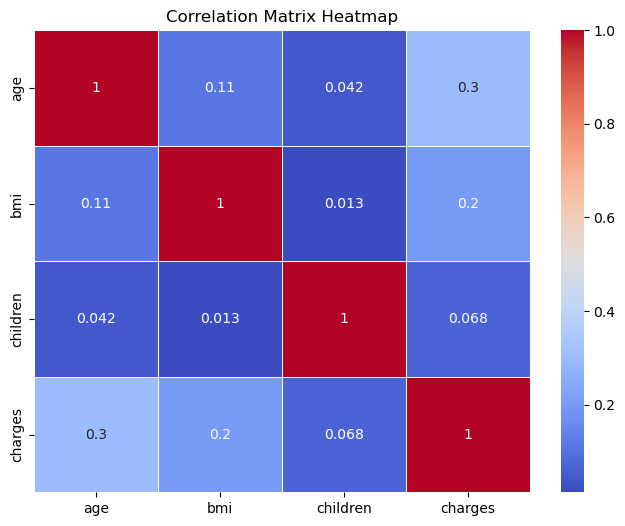

In [5]:
my_helper.CorrelationMatrixHeatMap(data)

In [6]:
# General Linear Regression Model
independent_vars = ['age', 'bmi', 'children']
dependent_var = ['charges']
X_train, X_test, y_train, y_test = my_helper.DataSplitter(data, independent_vars, dependent_var, 0.2)
model_output = my_helper.LinearRegressionFitter(X_train, y_train, X_test, y_test)
my_model = model_output['model']
mse = model_output['mse']
r2 = model_output['r2']
header = "General Model Including All Regions"
my_helper.ModelSummaryStats(my_model, mse, r2, header, independent_vars)

In [7]:
# One-hot encode the 'region' column
data_encoded = pd.get_dummies(data, columns=['region'])
independent_vars = ['age', 'bmi', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
dependent_var = ['charges']
X_train, X_test, y_train, y_test = my_helper.DataSplitter(data_encoded, independent_vars, dependent_var, 0.2)
model_output = my_helper.LinearRegressionFitter(X_train, y_train, X_test, y_test)
my_model = model_output['model']
mse = model_output['mse']
r2 = model_output['r2']
header = "General Model Including All Regions"
my_helper.ModelSummaryStats(my_model, mse, r2, header, independent_vars)


In [8]:
# Region Specific Linear Models
regions = ['Northeast', 'Northwest', 'Southeast', 'Southwest']
independent_vars = ['age', 'bmi', 'children']
dependent_var = ['charges']

for region in regions: 
    X_train, X_test, y_train, y_test = my_helper.DataSplitter(data[data['region'] == f'{region.lower()}'], independent_vars, dependent_var, 0.2)
    model_output = my_helper.LinearRegressionFitter(X_train, y_train, X_test, y_test)
    my_model = model_output['model']
    mse = model_output['mse']
    r2 = model_output['r2']
    header = f"{region} Model Including All Regions"
    my_helper.ModelSummaryStats(my_model, mse, r2, header, independent_vars)


In [22]:
my_helper.PremiumPredictorWidget()

c:\Users\jar5395\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


14402.59534972185